# Wine Project Part B
### Brett Karsten 
### Applied Stat Methods 001

## Import appropriate packages into code

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the red wine data and store it as a data frame 

In [4]:
Red_Wine = pd.read_csv("/Users/brettkarsten/VS code/Applied Stat methods project/Wine Quality/winequality-red.csv", header=0)

Suppose the population mean of the variable “density” is µ , do the following inferences:

a.  Provide an estimate of µ based on the sample;

b.  Use the Central Limit Theorem (CLT) to quantify the variability of your estimate;

c.  Use the CLT to give a 95% confidence interval for µ.

d.  Use the bootstrap method to do parts b and c, and compare the results with those
obtained from the CLT. State your findings.

e.  Can  we  use  a  normal  distribution  to  model  “density”?  If  yes,  what  are  the
maximum  likelihood  estimates  of  the  mean  and  standard  deviation?  Please
provide their standard errors as well.

Notes:

1a. The population includes all the red wines produced in the north of Portugal. The sample is these 1599 bottles of red wines tested. We use “the sample” (1599 rows of data) to make inference about the population mean parameter mu.

1e.  To find the  MLEs,  you  may  consider multiplying  the data  by  10.  This will  solve  a numerical problem you may encounter. You must transform back in the end.



### Suppose the population mean of the variable “density” is µ , do the following inferences:
## Question 1 part A: Provide an estimate of µ based on the sample

"Two datasets are included, related to red and white vinho verde wine **samples**, from the north of Portugal. The goal is to model wine quality based on physicochemical tests" from http://archive.ics.uci.edu/dataset/186/wine+quality

- the data provided from the website is already a sample so 1599 will be the sample size used

In [57]:
# lets store the density data from the population in a new variable 

density_data = Red_Wine['density']

In [58]:
# compute the sample mean / median 

density_mean_sample = np.mean(density_data)
print(density_mean_sample)

density_median_sample = np.median(density_data)
print(density_median_sample)

0.9967466791744841
0.99675


The mean of the sample is **0.996747** = ū. The sample size is 1599 outlined on the website the data was taken from.

## Question 1 part B: Use the Central Limit Theorem (CLT) to quantify the variability of your estimate

Central Limit Theorem: if X<sub>1</sub>, X<sub>2</sub>,X<sub>3</sub>...are random variables drawn
from the same population (distribution) with the mean (u) and the
variance, then the average X approximately follows: N(μ, σ²/n)


In [59]:
sd_density = round(np.std(density_data), 6)
print(sd_density)

0.001887


The standard deviation of the sample is **0.001887** = sd_density

In [60]:
# now lets use the central limit theorem and calculate the uncertainty of the estimate 


var_sample_density = sd_density / (np.sqrt(len(density_data)))
print(f'The variability based on the CLT for the density variable is: {var_sample_density}')

The variability based on the CLT for the density variable is: 4.7189749101501524e-05


The variability of the estimate based on the total population of red wines in Portugal is **4.7189749101501524e-05**


When looking at this value compared to the mean of the sample, we can see that the mean is close to 1 and the uncertainity parameter calculated above is close to 0. These values follow a normal distribution. Visually, we can see this with the histogram produced below.

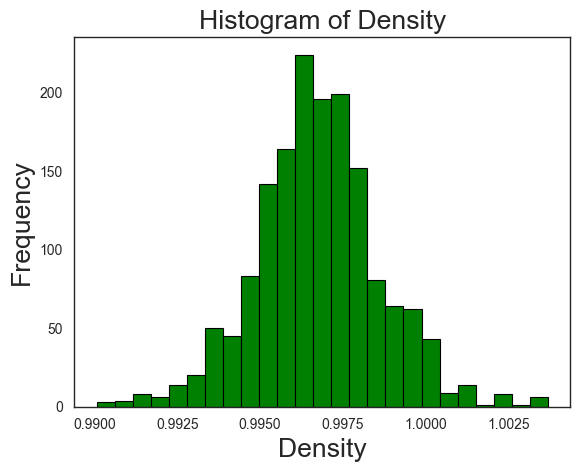

In [87]:
# lets view the distribution of the sample first 

plt.figure()
plt.hist(density_data, bins=25, color='green', edgecolor='black')
plt.title(f"Histogram of Density")
plt.xlabel("Density")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel("Frequency")
plt.show()

## Question 1 part C: Use the CLT to give a 95% confidence interval for μ

In [88]:
lower_bound = density_mean_sample - 2 * sd_density / (np.sqrt(len(density_data)))
upper_bound = density_mean_sample + 2 * sd_density / (np.sqrt(len(density_data)))

print(lower_bound)
print(upper_bound)

0.9966522996762811
0.9968410586726871


The 95% CI falls between **0.996652** and **0.996841**. This provides the range for which the mean is located, which is a fixed value. The common misconception here is that this provides a range for which the mean may fall as if the mean would change. In other words, this interval is the moving bucket that covers a fixed coin (population mean).

## Question 1 part D: Use the bootstrap method to do parts b and c, and compare the results with those obtained from the CLT. State your findings

In [41]:
# lets create a loop for the bootstrap

mu_density_list = []


for i in range(2500):
    bootstrap_density = np.random.choice(density_data, size = 1599, replace = True)
    mu_density = np.mean(bootstrap_density)
    mu_density_list.append(mu_density)


sd_list = np.std(mu_density_list)

print(f'The standard deviation of the density set is equal to {sd_list}')

The standard deviation of the density set is equal to 4.6971598327564883e-05


As we can see above, the variability calculated from the bootstrapping method is very similar to that value calculated using the CLT, which was **4.7189749101501524e-05** (CLT) vs. **4.6971598327564883e-05** using the bootstrap method

In [98]:
# now lets calculate the CI using the bootstrap method 

quantiles = np.quantile(mu_density_list, [0.025, 0.975])

print(f"Lower 95% CI bound: {quantiles[0]}")
print(f"Upper 95% CI bound: {quantiles[1]}")

Lower 95% CI bound: 0.9966540562851782
Upper 95% CI bound: 0.9968405894308943


CLT method: 

- 0.9966522996762811 (Lower) 2.5%
- 0.9968410586726871 (Upper) 97.5%

Bootstrap Method:

- 0.9966540562851782 (Lower) 2.5%
- 0.9968405894308943 (Upper ) 97.5%

Both methods provide the lower and upper bounds and are very similar to each other. It is important to note that every time the bootstrap method is ran, it will provide slightly different outputs since it samples the sample with replacement. 

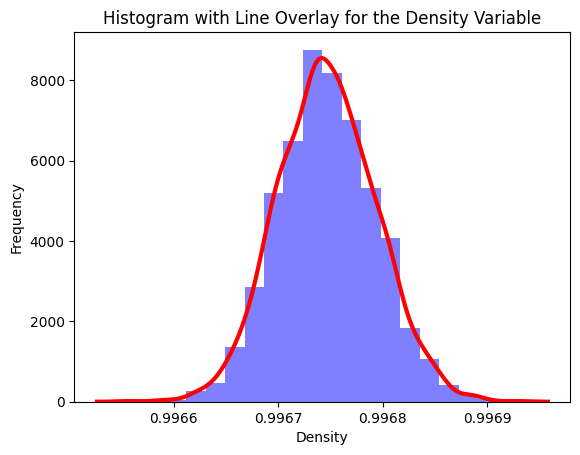

In [43]:
plt.hist(mu_density_list, density=True, alpha=0.5, bins=20, color='blue')
sns.kdeplot(mu_density_list, linewidth=3, color='red')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram with Line Overlay for the Density Variable')
plt.show()

In the Histogram above, we can see a mostly symmetric normal distribution from using the bootstrap method.

Suppose the population mean of the variable “residual sugar” is μ , answer the following
questions.

a. Provide an estimate of μ based on the sample;

b. Noting that the sample distribution of “residual sugar” is highly skewed, can we
use the CLT to quantify the variability of your estimate? Can we use the CLT to give
a 95% confidence interval for μ? If yes, please give your solution. If no, explain
why.

c. Use the bootstrap method to do part b. Is the bootstrap confidence interval
symmetric? (hint: check the bootstrap distribution; see p. 25-26 in Lecture 4).

d. Can we use a normal distribution to model “residual sugar”? If no, what
distribution do you think can approximate its empirical distribution? What
parameters are needed to characterize such a distribution? what are their
maximum likelihood estimates? Please provide their standard errors as well.

### Suppose the population mean of the variable “residual sugar” is μ , answer the following questions
## Question 2 Part A: Provide an estimate of μ based on the sample

In [5]:
# store the residual sugar data

residual_sugar_data = Red_Wine['residual sugar']

In [6]:
# provide an estimate of the mean based on the sample 

residual_sugar_mean = np.mean(residual_sugar_data)
print(residual_sugar_mean)

2.53880550343965


The mean estimate for the residual sugar variable is **2.5388** (rounded answer)

## Question 2 Part B: Noting that the sample distribution of “residual sugar” is highly skewed, can we use the CLT to quantify the variability of your estimate? Can we use the CLT to give a 95% confidence interval for μ? If yes, please give your solution. If no, explain why.

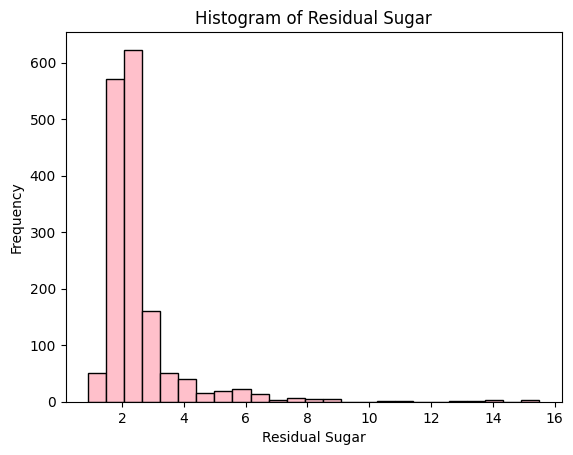

In [7]:
# lets look at the distribution first to display the skewness of the data 

plt.figure()
plt.hist(residual_sugar_data, bins=25, color='pink', edgecolor='black')
plt.title(f"Histogram of Residual Sugar")
plt.xlabel("Residual Sugar")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel("Frequency")
plt.show()

In the histogram above, we can see that the data is skewed. This distribution is not normal, but we can apply the central limit theorem to quantify the variability of the estimate. With a few calculations and comparison to the bootstrap method, we can demonstrate the CLT can be applied. However, the CLT can only be applied to the mean of the sample, so its use is limited. This is not the case with a bootstrapping method.

In [20]:
# calculate the standard deviation of the sample for residual sugar 

sd_residual_sugar = np.std(residual_sugar_data) # numpy std function uses n - 1 to compute standard deviation for unbiased output 
print(f'The standard deviation of the residual sugar variable is: {sd_residual_sugar}')
print(f'----------------------------------------------------------------------------------------')

# next, lets compute the variance like we did in question 1

var_sample_rs = sd_residual_sugar / (np.sqrt(len(residual_sugar_data)))
print(f'The variability based on CTL for the residual sugar data is: {var_sample_rs}')
print(f'----------------------------------------------------------------------------------------')

# now lets compute the upper and lower bounds for a 95% confidence interval

lower_bound_rs = residual_sugar_mean - 2 * sd_residual_sugar / (np.sqrt(len(residual_sugar_data)))
upper_bound_rs = residual_sugar_mean + 2 * sd_residual_sugar / (np.sqrt(len(residual_sugar_data)))

print(f'The lower bound for residual sugar is: {lower_bound_rs}')
print(f'The upper bound for residual sugar is: {upper_bound_rs}')
print(f'----------------------------------------------------------------------------------------')

# 

The standard deviation of the residual sugar variable is: 1.4094871124880504
----------------------------------------------------------------------------------------
The variability based on CTL for the residual sugar data is: 0.03524819459465339
----------------------------------------------------------------------------------------
The lower bound for residual sugar is: 2.468309114250343
The upper bound for residual sugar is: 2.609301892628957
----------------------------------------------------------------------------------------


The lower bound of the residual sugar confidence interval is **2.4683** and the upper bound is **2.6093**

## Question 2 Part C: Use the bootstrap method to do part b. Is the bootstrap confidence interval symmetric? (hint: check the bootstrap distribution; see p. 25-26 in Lecture 4)

In [25]:
# lets create a loop for the bootstrap, but use the residual sugar variable this time

mu_rs_list = []


for i in range(2500):
    bootstrap_density_rs = np.random.choice(residual_sugar_data, size = 1599, replace = True)
    mu_density_rs = np.mean(bootstrap_density_rs)
    mu_rs_list.append(mu_density_rs)


sd_list_rs = np.std(mu_rs_list)

print(f'The standard deviation of the residual sugar set is equal to {sd_list_rs}')
print(f'----------------------------------------------------------------------------------------')

# compute the lower and upper bounds 

quantiles_rs = np.quantile(mu_rs_list, [0.025, 0.975])

print(f"Lower 95% CI bound: {quantiles_rs[0]}")
print(f"Upper 95% CI bound: {quantiles_rs[1]}")

The standard deviation of the residual sugar set is equal to 0.03559117521920481
----------------------------------------------------------------------------------------
Lower 95% CI bound: 2.472466385240775
Upper 95% CI bound: 2.609609130706692


Using the bootstrap method, the standard deviation for the residual sugar variable is **0.03545**. Comparing this to the variablity estimate based on the CLT, **0.035248**, we can see that the values are very close. Since these results are similar, we can confirm that the central limit theorem can be applied to skewed data. The lower bound for residual sugar is **2.4725** and the upper is **2.6096** with 95% confidence. When comparing these with the CLT approach, the values are almost identical! (CLT lower/upper: 2.4683 - 2.6093)

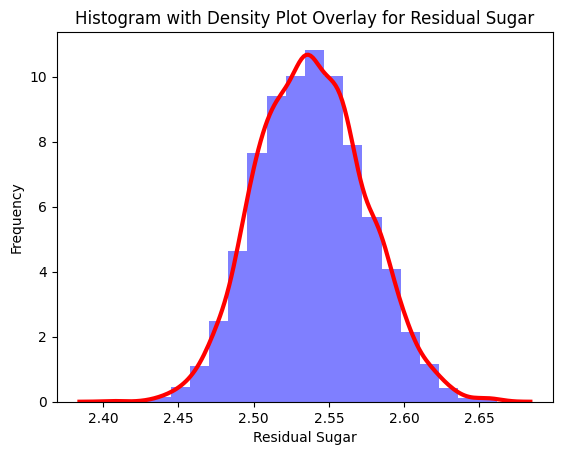

In [37]:
# display the distribution from the bootstrap method, this will demonstrate a normal distribtution 

plt.hist(mu_rs_list, density=True, alpha=0.5, bins=20, color='blue')
sns.kdeplot(mu_rs_list, linewidth=3, color='red')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Histogram with Density Plot Overlay for Residual Sugar')
plt.show()


Looking at the histogram above, we can see a normal distribution shape. The bootstrap confidence interval is mostly symmetric, which was expected. The bootstrap method is safe to use.

3 - We classify those wines as “excellent” if their rating is at least 7. Suppose the population
proportion of excellent wines is p. Do the following:


a. Use the CLT to derive a 95% confidence interval for p;

b. Use the bootstrap method to derive a 95% confidence interval for p;

c. Compare the two intervals. Is there any difference worth our attention?

d. What is the maximum likelihood estimate of p and its standard error?


Note: you need to create a new column of data for the new variable “excellent” which
has binary values (0 and 1). Its value is 1 if the wine rating >=7, and otherwise its value
is 0. Then, you can make inference about the underlying proportion parameter p using
this column of data.

## Question 3 Part A: Use the CLT to derive a 95% confidence interval for p

In [10]:
# first we need to make a new column of data for the new variable "excellent". 
# this will have binary values, either 0 or 1. The value of 1 will represent a wine rating greater than ir equal to 7. 
# if this value is lower, then the value will be 0

excellent_wines = []

for quality in Red_Wine['quality']:
    if quality >= 7:
        excellent_wines.append(1)
    else:
        excellent_wines.append(0)

Red_Wine['excellent'] = excellent_wines


print(excellent_wines)
print(Red_Wine['excellent'])



[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [27]:
# compute the mean of the excellent wines 

excellent_mean_p = np.mean(Red_Wine['excellent'])
print(excellent_mean_p)

0.1357098186366479


The mean for excellent wines (value greater than or equal to 7) is **0.1357098**.

In [32]:
# calculate the variability 


var_excellent_p = np.sqrt(excellent_mean_p * (1 - excellent_mean_p) / len(Red_Wine['excellent']))
print(var_excellent_p)



0.008564681018695619


The variability for the excellent wine column is **0.00856468**.

In [34]:
# calculate the lower and upper bounds of the confidence interval 


lower_confidence_p = excellent_mean_p - 2 * (var_excellent_p)
print(lower_confidence_p)

0.11858045659925667


The lower bound is **0.118580**.

In [35]:
# calculate the upper bound of the confidence interval

upper_confidence_p = excellent_mean_p + 2 * (var_excellent_p)
print(upper_confidence_p)

0.15283918067403915


The upper bound is **0.152839**.

Using the CLT, with a 95% confidence - the interval is between 0.118580 and 0.152839

## Question 3 Part B: Use the bootstrap method to derive a 95% confidence interval for p

In [49]:
# create a bootstrap to derive a 95% confidence interval for p

mu_quality_list = []


for i in range(2500):
    bootstrap_quality = np.random.choice(excellent_wines, size = 1599, replace = True)
    mu_quality = np.mean(bootstrap_quality)
    mu_quality_list.append(mu_quality)


sd_list_p = np.std(mu_quality_list)

print(f'The standard deviation of the quality set is equal to {sd_list_p}')

quantiles_quality = np.quantile(mu_quality_list, [0.025, 0.975])

print(f"Lower 95% CI bound: {quantiles_quality[0]}")
print(f"Upper 95% CI bound: {quantiles_quality[1]}")

The standard deviation of the quality set is equal to 0.008577635147746334
Lower 95% CI bound: 0.11944965603502189
Upper 95% CI bound: 0.15259537210756724


## Question 3 Part C: Compare the two intervals. Is there any difference worth our attention?

The CLT confidence interval values:

Lower:

- 0.118580

Upper: 

- 0.152839

The bootstrap method confidence interval values: 

Lower: 

- 0.1194497

Upper: 

- 0.1525954


When comparing these values using the central limit theorem vs. the bootstrap method, we can see that the values are very close to one another. This demonstrates the validity of both methods. While the CLT is useful for deriving standard errors for the sample mean and the 95% confidence intervals for the population mean, there are some limitations. Those limits include the following: 

- it can only be applied to the sample mean 

The bootstrapping method is not limited to the sample mean and can quantify the variability / uncertainty of other estimates.

TL;DR - both intervals from each method gives nearly identical outputs that do not require further investigation. 

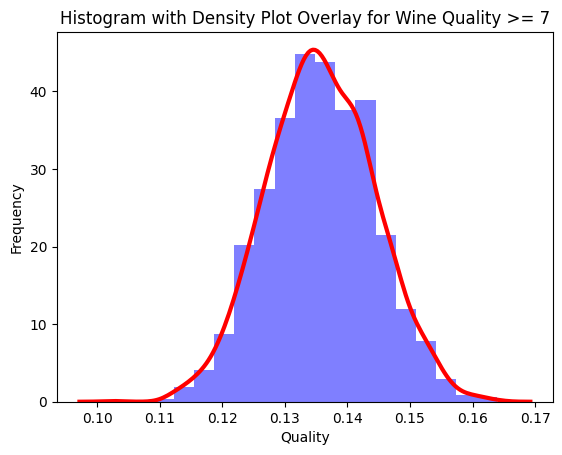

In [53]:
# lets visualize the distribution one more time 

plt.hist(mu_quality_list, density=True, alpha=0.5, bins=19, color='blue')
sns.kdeplot(mu_quality_list, linewidth=3, color='red')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Histogram with Density Plot Overlay for Wine Quality >= 7')
plt.show()